In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/disease-outbreak/disease outbreak.csv')
df.head()

,Dosage_mg,Age,Symptom_Severity,Recovery_Time_Days,Previous_Medications,Side_Effects_Severity,Effective
0,330,45,7,20,2,3,1
1,180,36,5,15,1,1,0
2,450,58,9,22,4,4,1
3,250,63,6,10,3,2,0
4,120,30,4,12,2,0,0


In [3]:
#Train-test split
X = df[['Dosage_mg', 'Age', 'Symptom_Severity', 'Recovery_Time_Days', 'Previous_Medications', 'Side_Effects_Severity']]
y = df['Effective']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [4]:
# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

In [5]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy on Test Set: {accuracy:.2f}')
print(classification_report(y_test, predictions))


Accuracy on Test Set: 0.94
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.91      1.00      0.95        10

    accuracy                           0.94        16
   macro avg       0.95      0.92      0.93        16
weighted avg       0.94      0.94      0.94        16



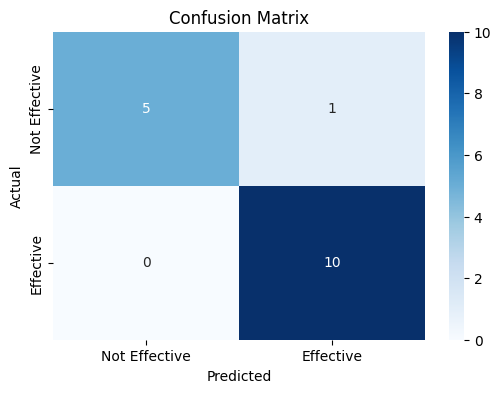

In [6]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Effective', 'Effective'], yticklabels=['Not Effective', 'Effective'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


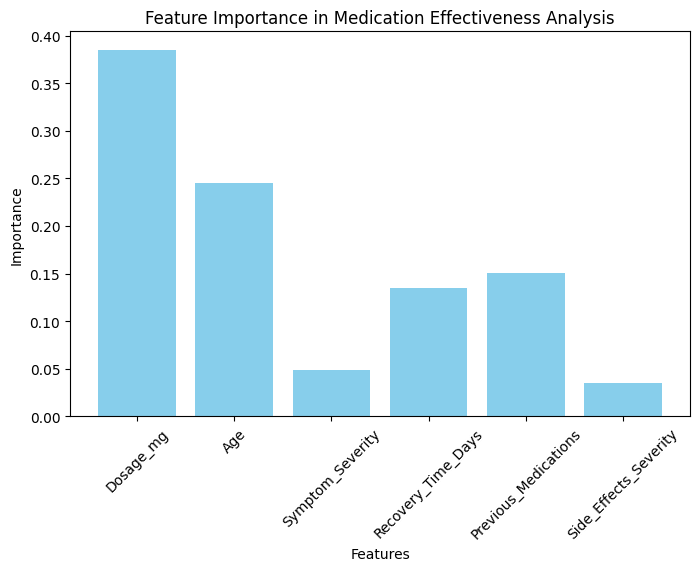

In [7]:
# Feature Importance
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.bar(X.columns, feature_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Medication Effectiveness Analysis')
plt.xticks(rotation=45)
plt.show()